## Importing Libraries 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

# Task 1
## Linear Regression with Gradient decent

#### Loading dataset


In [6]:
# Loading the dataset
data = pd.read_csv('housing.csv')
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     546 non-null    int64 
 1   lotsize   546 non-null    int64 
 2   bedrooms  546 non-null    int64 
 3   bathrms   546 non-null    int64 
 4   stories   546 non-null    int64 
 5   driveway  546 non-null    object
 6   recroom   546 non-null    object
 7   fullbase  546 non-null    object
 8   gashw     546 non-null    object
 9   airco     546 non-null    object
 10  garagepl  546 non-null    int64 
 11  prefarea  546 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.3+ KB


#### Converting Categorical data to Numerical data

In [7]:
cat_var = ["driveway", "recroom", "fullbase", "gashw", "airco", "prefarea"]
data[cat_var] = data[cat_var].replace({'yes': 1, 'no': 0})

data.head()
data.describe()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


#### Counting missing values

In [8]:
missingvalues = data.isnull().sum()
print(missingvalues)

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64


## Task 1-1

Epoch 1, RMSE: 1.0
Epoch 2, RMSE: 0.9697884574076622
Epoch 3, RMSE: 0.94147383386553
Epoch 4, RMSE: 0.9149631204555134
Epoch 5, RMSE: 0.8901661905216641
Epoch 6, RMSE: 0.8669956895281291
Epoch 7, RMSE: 0.8453669509491458
Epoch 8, RMSE: 0.8251979364042534
Epoch 9, RMSE: 0.8064091976745805
Epoch 10, RMSE: 0.7889238577249919

Optimized Weights: [-2.12512141e-16  2.87939763e-01  5.06013808e-02  2.69590587e-01
  2.13174273e-01  8.72551968e-02  6.46393726e-02  9.74574654e-02
  1.00535352e-01  2.20313952e-01  1.36917644e-01  1.48788271e-01]


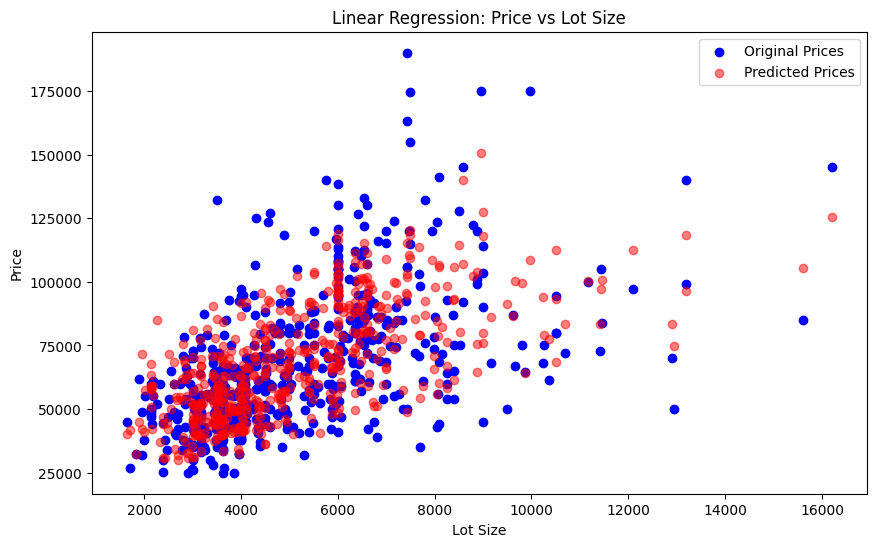

R^2 Score: 0.6731236203521589


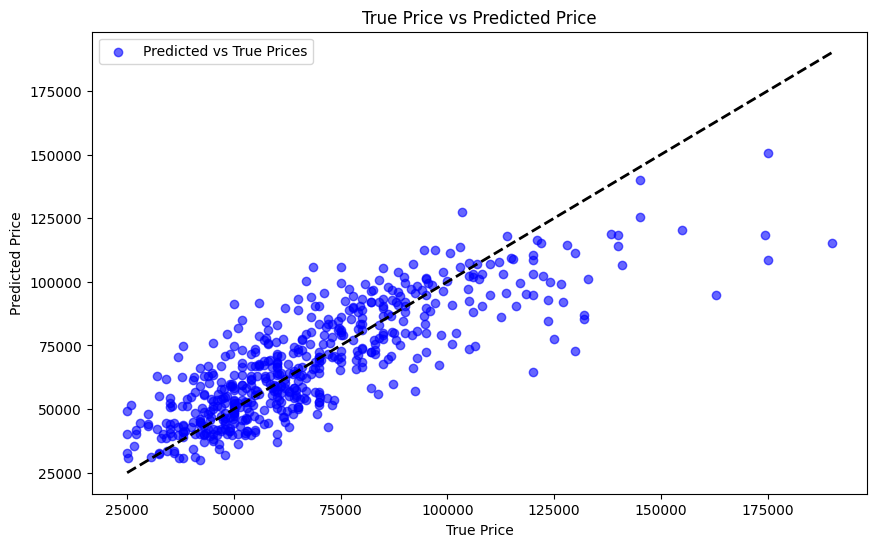

In [9]:
#Separating features and target variable
X = data.drop(columns=["price"]).values  
y = data["price"].values.reshape(-1, 1)

#Normalizing features (z-score normalization)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

#Avoiding division by zero
X_std[X_std == 0] = 1  
X_norm = (X - X_mean) / X_std

#Normalizing the target variable y
y_mean = np.mean(y)
y_std = np.std(y)
if y_std == 0:
    y_std = 1
y_norm = (y - y_mean) / y_std

#Adding a column of ones to X_norm for the bias term (intercept)
X_norm = np.c_[np.ones(X_norm.shape[0]), X_norm]

#Initializing weights and hyperparameters
#Number of samples (m) and features including bias (n)
m, n = X_norm.shape

#Initializing weights as zeros
weights = np.zeros((X_norm.shape[1], 1))
learning_rate = 0.01
epochs = 1000

#Gradient Descent algorithm
rmse_history = []
for epoch in range(epochs):
    
    #Initializing predictions as an empty list
    y_pred_norm = []

    #Manually compute predictions using weights and normalized features
    for i in range(m): 
        pred = 0
        for j in range(n): 
            pred += weights[j] * X_norm[i][j] 
        y_pred_norm.append(pred)

    #Converting predictions to a numpy array with shape (m, 1)
    y_pred_norm = np.array(y_pred_norm).reshape(-1, 1)

    #Calculating errors
    errors = y_pred_norm - y_norm 

    #Calculating Root Mean Squared Error (RMSE)
    mse = (1 / m) * np.sum(errors ** 2)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    rmse_history.append(rmse)
    
    #Computing the gradient and updating the weights
    for j in range(n):
        gradient_sum = 0  
        for i in range(m): 
            gradient_sum += (y_pred_norm[i] - y_norm[i]) * X_norm[i][j]
        weights[j] -= (learning_rate * 2 / m) * gradient_sum  

    #Printing RMSE first 10 epochs
    if epoch<10:
        print(f"Epoch {epoch + 1}, RMSE: {rmse}")

#Printing optimized weights
print("\nOptimized Weights:", weights.flatten())

#Converting predictions back to the original scale
y_pred_final = (y_pred_norm * y_std) + y_mean 

#Scatter Plot for 'Lot Size' vs Price
lot_sizes = data["lotsize"].values
plt.figure(figsize=(10, 6))
plt.scatter(lot_sizes, y, color='blue', label='Original Prices')
plt.scatter(lot_sizes, y_pred_final, color='red', label='Predicted Prices', alpha=0.5)
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Lot Size')
plt.legend()
plt.show()

#Calculating R2 Score
#Total sum of squares
ss_total = np.sum((y - y.mean()) ** 2) 
#Residual sum of squares
ss_residual = np.sum((y - y_pred_final) ** 2)  
r_squared = 1 - (ss_residual / ss_total)
print(f"R^2 Score: {r_squared}")

#Scatter Plot of True Price vs Predicted Price
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_final, color='blue', alpha=0.6, label="Predicted vs True Prices")
#Line for perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.legend()
plt.show()

## Task 1-2

Epoch 1, Cost: 1.0, RMSE: 1.0
Epoch 2, Cost: 0.940489652121133, RMSE: 0.9697884574076622
Epoch 3, Cost: 0.8863729798534595, RMSE: 0.94147383386553
Epoch 4, Cost: 0.8371575117936905, RMSE: 0.9149631204555134
Epoch 5, Cost: 0.7923958467478516, RMSE: 0.8901661905216642
Epoch 6, Cost: 0.751681525660356, RMSE: 0.8669956895281291
Epoch 7, Cost: 0.7146452817570556, RMSE: 0.8453669509491458
Epoch 8, Cost: 0.6809516342458383, RMSE: 0.8251979364042534
Epoch 9, Cost: 0.6502957940941607, RMSE: 0.8064091976745804
Epoch 10, Cost: 0.6224008532876832, RMSE: 0.7889238577249919


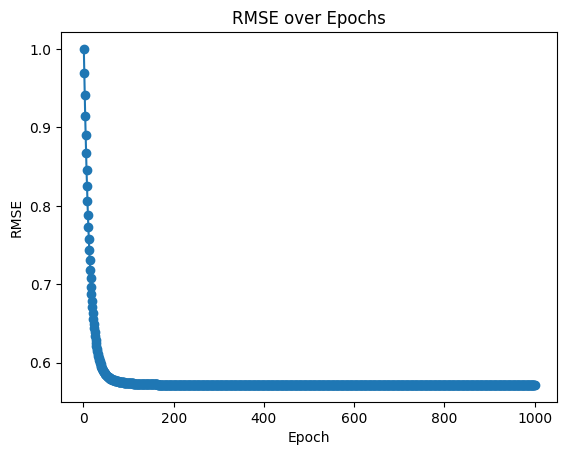

Optimized Weights: [-2.16481290e-16  2.87939763e-01  5.06013808e-02  2.69590587e-01
  2.13174273e-01  8.72551968e-02  6.46393726e-02  9.74574654e-02
  1.00535352e-01  2.20313952e-01  1.36917644e-01  1.48788271e-01]


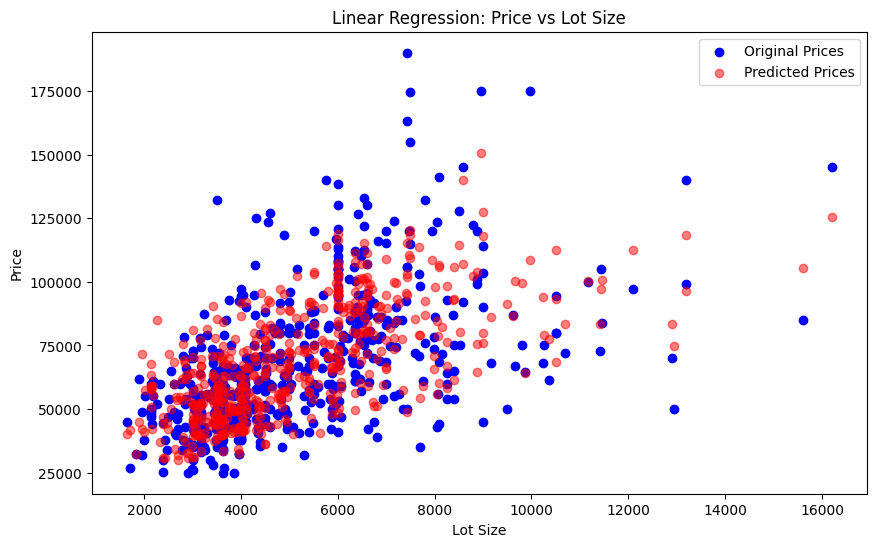

R²: 0.6731236203569366


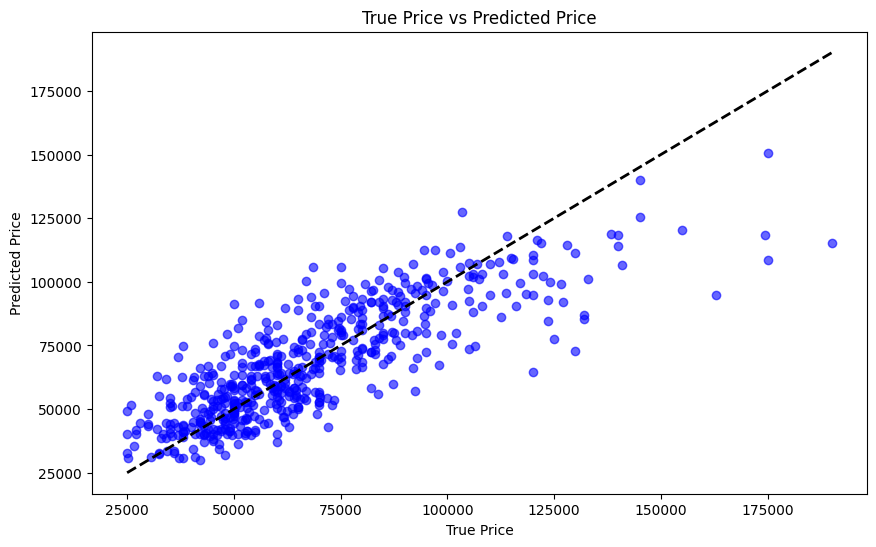

In [10]:
#Separating features and target variable
X = data.drop(columns=["price"]).values  
y = data["price"].values.reshape(-1, 1) 

#Normalizing features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

#Avoiding division by zero in normalization
X_std[X_std == 0] = 1  

X = (X - X_mean) / X_std

#Normalize target variable y
y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std

#Adding a column of ones to X for the bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]

#Initializing weights and hyperparameters
#Number of samples (m) and features including bias (n)
m, n = X.shape 
W = np.zeros((n, 1))

#Increasing the learning rate and reducing epochs to check stability
learning_rate = 0.01 
epochs = 1000  

#Gradient Descent Algorithm with RMSE
rmse_history = []

for epoch in range(epochs):
    #Calculating the predictions using Linear Regression
    y_pred = X.dot(W)
    
    #Computing the cost function based on the provided formula
    cost = (1 / m) * ((y_pred - y).T.dot(y_pred - y)).item() 

    #Calculating RMSE
    rmse = np.sqrt((1 / m) * np.sum((y_pred - y) ** 2))
    rmse_history.append(rmse)
    
    #Calculating the gradient based on the provided formula
    gradient = (2 / m) * X.T.dot(y_pred - y)
    
    #Updating the weights
    W -= learning_rate * gradient
    
    #Printing cost and RMSE every 100 epochs to monitor convergence
    if epoch<10:
        print(f"Epoch {epoch + 1}, Cost: {cost}, RMSE: {rmse}")


#Plotting RMSE over epochs
plt.plot(range(1, epochs + 1), rmse_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over Epochs')
plt.show()

#Displaying the optimized weights
print("Optimized Weights:", W.flatten())

#Final predictions on the normalized scale
y_pred_normalized = X.dot(W)

#Converting predictions back to original scale for y
y_pred_final = y_pred_normalized * y_std + y_mean
y = y * y_std + y_mean  # Also revert y back to original scale

#Calculating R2 Score on the original scale
#Total sum of squares
ss_total = np.sum((y - y.mean()) ** 2)  
ss_residual = np.sum((y - y_pred_final) ** 2)
#Residual sum of squares
r2 = 1 - (ss_residual / ss_total)
#print(f"R²: {r2}")

#Scatter Plot of True Price vs Predicted Price based on 'Lot Size'
plt.figure(figsize=(10, 6))
plt.scatter(data["lotsize"], y, color='blue', label='Original Prices')
plt.scatter(data["lotsize"], y_pred_final, color='red', label='Predicted Prices', alpha=0.5)
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Lot Size')
plt.legend()
plt.show()

print(f"R²: {r2}")

#True vs Predicted Prices Plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_final, color='blue', alpha=0.6)
#Line for perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.show()

# Task 2
## Binary Classification with Logistic Regression

#### Loading Datasets

In [11]:
#Loading the training and test datasets
train_data = pd.read_csv('heart_disease_train.csv')
test_data = pd.read_csv('heart_disease_test.csv')

#### Checking Missing Values

In [12]:
#Check for missing values
print("\nMissing values in training data:")
print(train_data.isnull().sum())

print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in training data:
gender               0
age                  0
education           84
currentSmoker        0
cigsPerDay          25
BPMeds              42
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             44
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            315
TenYearCHD           0
dtype: int64

Missing values in test data:
gender              0
age                 0
education          21
currentSmoker       0
cigsPerDay          4
BPMeds             11
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             6
sysBP               0
diaBP               0
BMI                 3
heartRate           0
glucose            73
TenYearCHD          0
dtype: int64


#### Distribution of Target variable 'TenYearCHD' in Traning and Testing Datasets 

In [13]:
#Checking the distribution of the target variable 'TenYearCHD'
target_cnt_1 = train_data['TenYearCHD'].value_counts()
print("Number of data points in each class of 'TenYearCHD' in train data:")
print(target_cnt_1)

#Checking the distribution of the target variable 'TenYearCHD'
target_cnt_2 = test_data['TenYearCHD'].value_counts()
print("Number of data points in each class of 'TenYearCHD' in test data:")
print(target_cnt_2)

Number of data points in each class of 'TenYearCHD' in train data:
TenYearCHD
0    2874
1     516
Name: count, dtype: int64
Number of data points in each class of 'TenYearCHD' in test data:
TenYearCHD
0    720
1    128
Name: count, dtype: int64


#### Gradient Descent Algorithm and Performace Evaluation 

In [14]:
#Calculating correlation matrix for training data
correlation_matrix = train_data.corr()

#Define a function to fill missing values based on subcategory mean
def fill_mv(df, col_fill, subcat_col):
    #Filling missing values by the mean of the groups based on the correlated column
    df[col_fill] = df[col_fill].fillna(df.groupby(subcat_col)[col_fill].transform("mean"))

#Iterate over each column with missing values
for col in train_data.columns:
    if train_data[col].isnull().any() and col != 'TenYearCHD':  # Exclude target column
        # Find the most correlated feature to this column, excluding itself
        most_corr_feat = correlation_matrix[col].drop(col).idxmax()
        
        # Fill missing values in this column based on the most correlated feature
        fill_mv(train_data, col, most_corr_feat)
        fill_mv(test_data, col, most_corr_feat)
        
print(correlation_matrix)


#Check if there are any remaining missing values after filling based on correlation
print("Missing values in training data")
print(train_data.isnull().sum())

print("\n Missing values in testing data")
print(test_data.isnull().sum())

#Separating features and target variable for both training and test sets
X_train = train_data.drop(columns=['TenYearCHD']).values
y_train = train_data['TenYearCHD'].values.reshape(-1, 1)

X_test = test_data.drop(columns=['TenYearCHD']).values
y_test = test_data['TenYearCHD'].values.reshape(-1, 1)

#Normalizling features for better convergence (z-score normalization)
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

#Checking if the dataset is balanced
print("\nClass distribution in training data:")
print(train_data['TenYearCHD'].value_counts(normalize=True))

print("\nClass distribution in test data:")
print(test_data['TenYearCHD'].value_counts(normalize=True))

#Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Initializing weights and hyperparameters
m, n = X_train.shape 
W = np.zeros((n, 1))
learning_rate = 0.01
epochs = 1000

#Gradient Descent
for epoch in range(epochs):
   
    z = X_train.dot(W) 
    y_pred = sigmoid(z)
    
    #Cost function
    cost = (-1 / m) * np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))
    
    #Print cost for first 10 epochs
    if epoch < 10:
        print(f"Epoch {epoch + 1}: Cost = {cost:.4f}")

    #Gradient calculation
    gradient = (1 / m) * X_train.T.dot(y_pred - y_train)
    
    #Updating the weights
    W -= learning_rate * gradient

def evaluate_performance(y_true, y_pred):
    # Converting probabilities to binary predictions (threshold = 0.5)
    y_pred_binary = (y_pred >= 0.5).astype(int)

    # Calculating confusion matrix components
    TP = np.sum((y_pred_binary == 1) & (y_true == 1))
    TN = np.sum((y_pred_binary == 0) & (y_true == 0))
    FP = np.sum((y_pred_binary == 1) & (y_true == 0))
    FN = np.sum((y_pred_binary == 0) & (y_true == 1))
    
    # Accuracy, Precision, Recall
    accuracy = round((TP + TN) / (TP + TN + FP + FN), 4)
    precision = round(TP / (TP + FP), 4) if (TP + FP) > 0 else 0
    recall = round(TP / (TP + FN), 4) if (TP + FN) > 0 else 0
    
    # Display the metrics
    print(f"Confusion Matrix: \n TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    
#Predictions on training data
y_train_pred = sigmoid(X_train.dot(W))
print("\nTraining Data Evaluation:")
evaluate_performance(y_train, y_train_pred)

#Predictions on test data
y_test_pred = sigmoid(X_test.dot(W))
print("\nTesting Data :")
evaluate_performance(y_test, y_test_pred)


                   gender       age  education  currentSmoker  cigsPerDay  \
gender           1.000000 -0.021699   0.017740       0.197109    0.312110   
age             -0.021699  1.000000  -0.156948      -0.218453   -0.186060   
education        0.017740 -0.156948   1.000000       0.011334    0.003289   
currentSmoker    0.197109 -0.218453   0.011334       1.000000    0.771015   
cigsPerDay       0.312110 -0.186060   0.003289       0.771015    1.000000   
BPMeds          -0.063121  0.126578  -0.002784      -0.047996   -0.043402   
prevalentStroke  0.000538  0.068083  -0.032811      -0.032615   -0.029953   
prevalentHyp    -0.003935  0.304355  -0.062608      -0.096925   -0.063781   
diabetes         0.021348  0.110090  -0.044612      -0.048919   -0.046534   
totChol         -0.075607  0.262306  -0.009843      -0.051385   -0.021426   
sysBP           -0.041278  0.386243  -0.113493      -0.130769   -0.090941   
diaBP            0.057516  0.204637  -0.043689      -0.103222   -0.055125   